In [ ]:
import pandas as pd
import numpy as np
!pip install nltk
import nltk
nltk.download('punkt_tab')
import matplotlib.pyplot as plt
!pip install lime

from lime.lime_text import LimeTextExplainer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=483f6ed4abd2968eb83b605d3269e258caf507553ae3ee8f16c46bf193e8e439
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/fake reviews dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
print("Shape of the dataset:", df.shape)
print("\nData Information:")
df.info()

Shape of the dataset: (40432, 4)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
display(df.head())
display(df.tail())

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


,category,rating,label,text_
40427,Clothing_Shoes_and_Jewelry_5,4,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry_5,5,OR,I work in the wedding industry and have to wor...


In [ ]:
display(df.describe())

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
print("\nMissing values in each column:\n", df.isnull().sum())  # Check for missing


Missing values in each column:
 category    0
rating      0
label       0
text_       0
dtype: int64


In [ ]:
print("\nColumn names:", df.columns)


Column names: Index(['category', 'rating', 'label', 'text_'], dtype='object')


<ipython-input-9-bb5cfe46251f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='coolwarm')


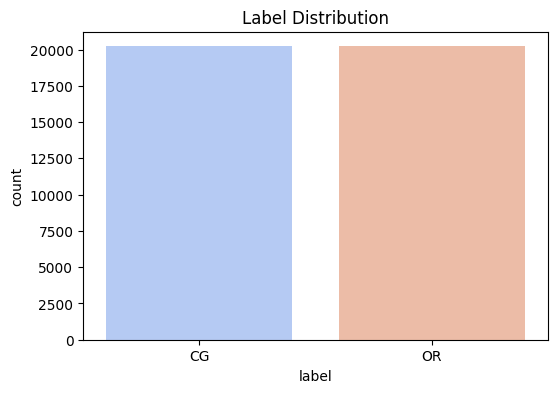

In [ ]:
import seaborn as sns
# EDA: Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette='coolwarm')
plt.title("Label Distribution")
plt.show()


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['processed_text'] = df['text_'].apply(preprocess_text)
# Now you can access 'processed_text' column


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("\nColumn names:", df.columns)


Column names: Index(['category', 'rating', 'label', 'text_'], dtype='object')


<ipython-input-11-5cc39b44b5d0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["rating"], palette="viridis")


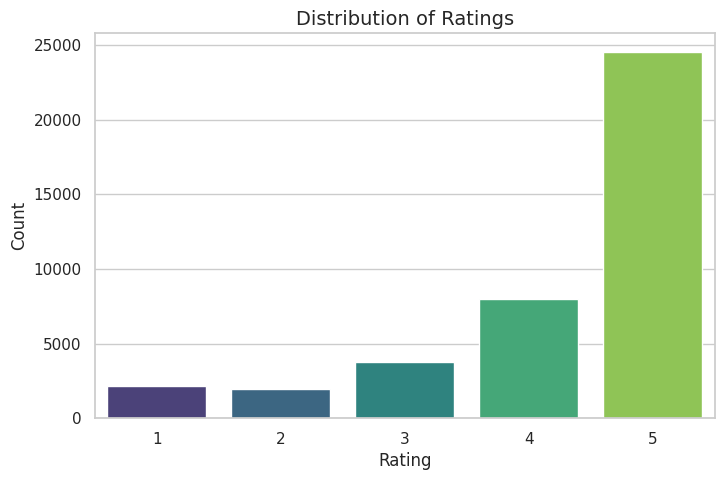

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/fake reviews dataset.csv")

# Set style for plots
sns.set(style="whitegrid")

# Plot 1: Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df["rating"], palette="viridis")
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-12-40d917b9e67c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")


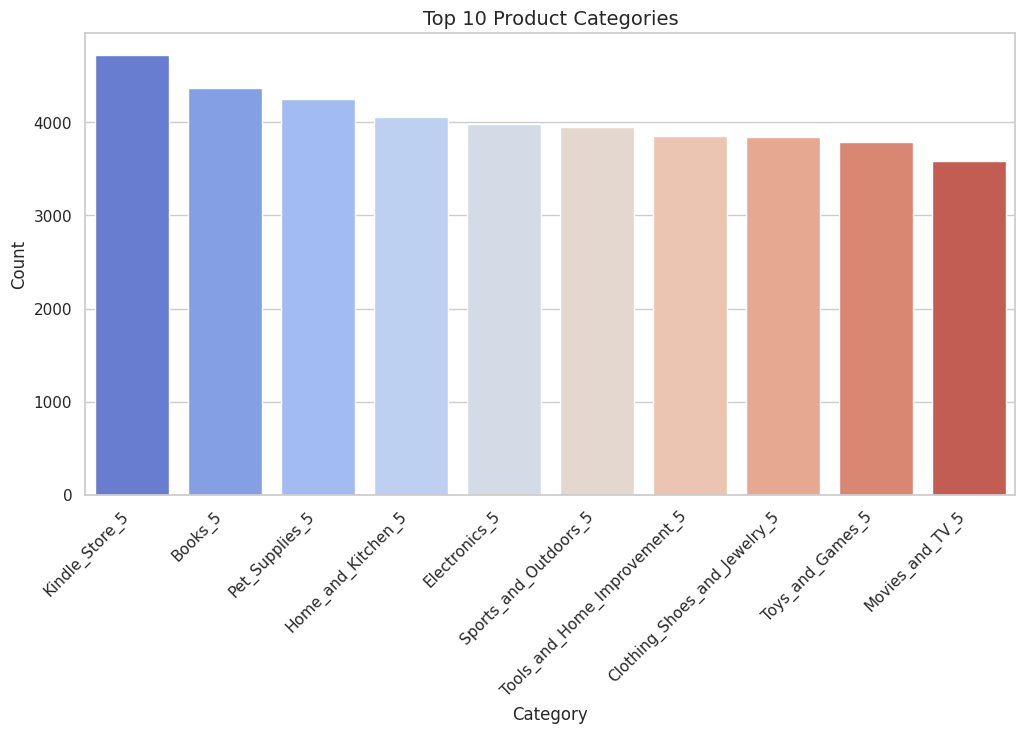

In [ ]:
# Plot 2: Distribution of Categories (Top 10)
plt.figure(figsize=(12, 6))
top_categories = df["category"].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Product Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for 'label' column
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['processed_text'] = df['text_'].apply(preprocess_text)
# Now you can access 'processed_text' column


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X = df['processed_text']
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
vectorizer_file = "/content/drive/MyDrive/vectorizer.pkl"
with open(vectorizer_file, "wb") as f:
    pickle.dump(vectorizer, f)

<ipython-input-23-5e53764de09a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values, palette="magma")


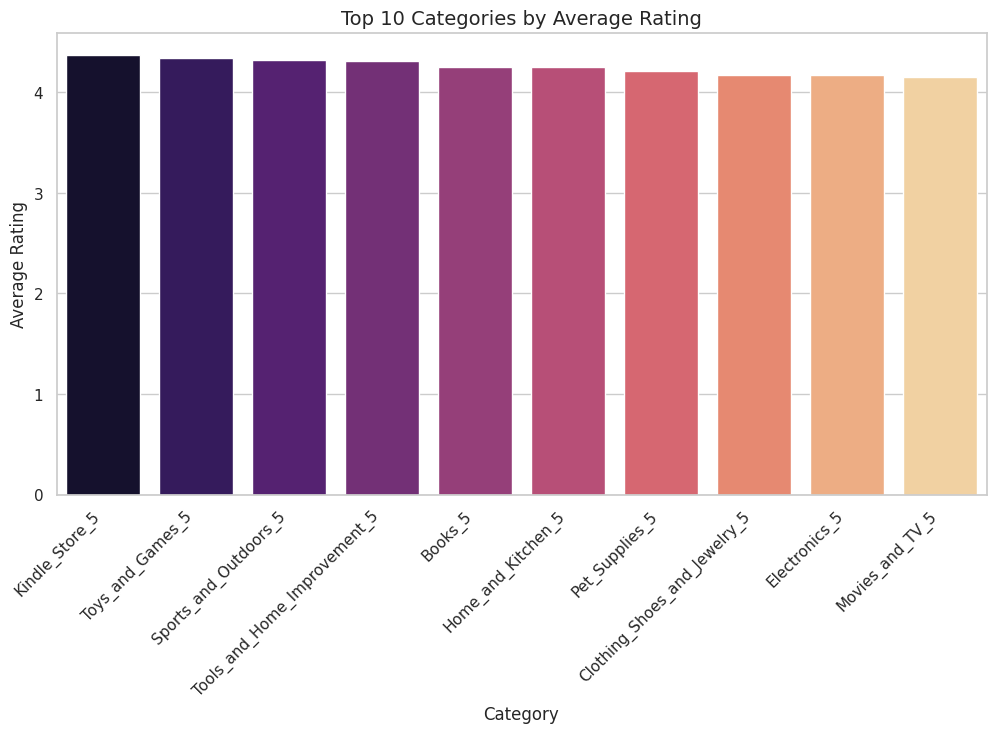

In [ ]:
plt.figure(figsize=(12, 6))
avg_rating_per_category = df.groupby("category")["rating"].mean().nlargest(10)
sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Categories by Average Rating", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.show()


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_model_file = "/content/drive/MyDrive/logistic_regression.pkl"
with open(lr_model_file, "wb") as f:
    pickle.dump(lr_model, f)

print("Logistic Regression model trained and saved!")

Logistic Regression model trained and saved!


In [ ]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train_tfidf, y_train)
mlp_model_file = "/content/drive/MyDrive/MLP_Classifier.pkl"
with open(mlp_model_file, "wb") as f:
    pickle.dump(mlp_model, f)

print("MLPClassifier model trained and saved!")

MLPClassifier model trained and saved!


In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)
gb_model_file = "/content/drive/MyDrive/gradient_boosting.pkl"
with open(gb_model_file, "wb") as f:
    pickle.dump(gb_model, f)

print("Gradient Boosting model trained and saved!")

Gradient Boosting model trained and saved!


In [ ]:
trained_models = {
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "MLP Classifier": mlp_model,
    "Gradient Boosting": gb_model
}

# Evaluate models
y_test_binary = y_test
for name, model in trained_models.items():
    y_pred = model.predict(X_test_tfidf)



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Fake", "Genuine"], yticklabels=["Fake", "Genuine"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

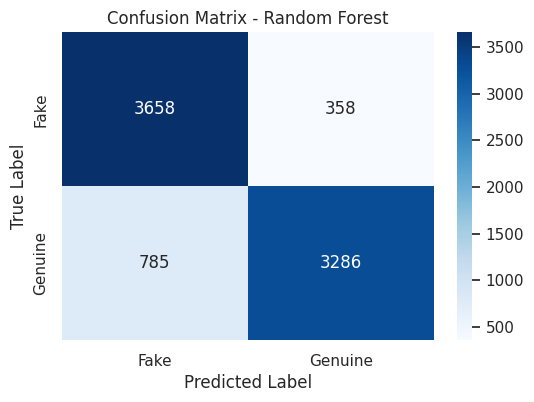

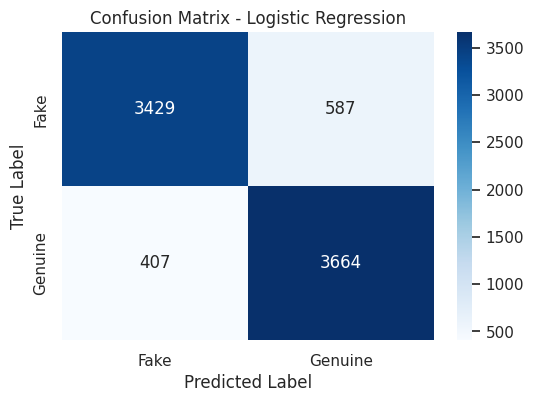

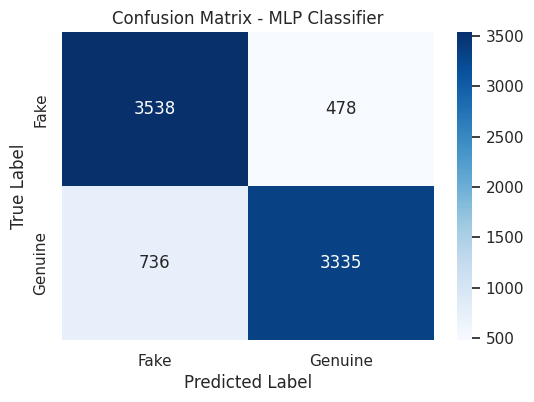

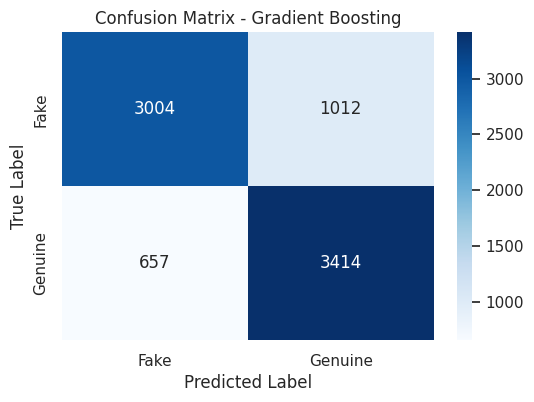

In [ ]:
# Random Forest
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]
# Assuming 'OR' is the positive class
y_test_binary = y_test.map({'CG': 0, 'OR': 1})

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)
y_pred_prob_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

y_pred_lr = mlp_model.predict(X_test_tfidf)
y_pred_prob_lr = mlp_model.predict_proba(X_test_tfidf)[:, 1]

plot_confusion_matrix(y_test, y_pred_lr, "MLP Classifier")

y_pred_gb = gb_model.predict(X_test_tfidf)
y_pred_prob_gb = gb_model.predict_proba(X_test_tfidf)[:, 1]

plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")


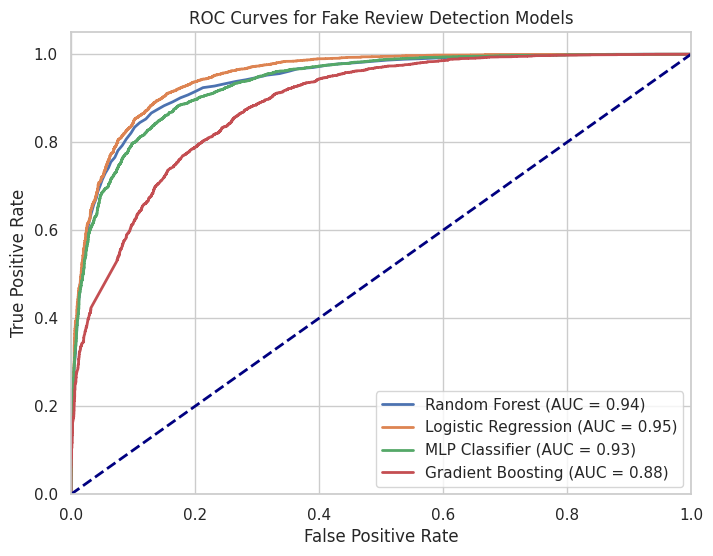

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8, 6))
y_test_binary = y_test

def plot_roc(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plot_roc(rf_model, X_test_tfidf, y_test_binary, "Random Forest")
plot_roc(lr_model, X_test_tfidf, y_test_binary, "Logistic Regression")
plot_roc(mlp_model, X_test_tfidf, y_test_binary, "MLP Classifier")
plot_roc(gb_model, X_test_tfidf, y_test_binary, "Gradient Boosting")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Fake Review Detection Models')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [ ]:
y_pred_rf = rf_model.predict(X_test_tfidf)

print("\n Random Forest Model Performance ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

y_pred_lr = lr_model.predict(X_test_tfidf)
print("\n Logistic Regression Model Performance ")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

y_pred_gb = mlp_model.predict(X_test_tfidf)
print("\n MLP Classifier Model Performance ")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

y_pred_gb = gb_model.predict(X_test_tfidf)
print("\n Gradient Boosting Model Performance ")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


 Random Forest Model Performance 
Accuracy: 0.8586620502040312
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4016
           1       0.90      0.81      0.85      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087


 Logistic Regression Model Performance 
Accuracy: 0.8770866823296649
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4016
           1       0.86      0.90      0.88      4071

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087


 MLP Classifier Model Performance 
Accuracy: 0.849882527513293
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4016
           1       0.87      0.82      

In [ ]:
vectorizer_file = "/content/drive/MyDrive/vectorizer.pkl"
with open(vectorizer_file, "rb") as f:
    vectorizer = pickle.load(f)


explainer = LimeTextExplainer(class_names=["Fake", "Genuine"])

# Function to load a model
def load_model(model_name):
    model_files = {
        "RandomForest": "/content/drive/MyDrive/random_forest.pkl",
        "LogisticRegression": "/content/drive/MyDrive/logistic_regression.pkl",
        "GradientBoosting": "/content/drive/MyDrive/gradient_boosting.pkl"
    }
    if model_name not in model_files:
        print("Invalid model name! Choose from:", list(model_files.keys()))
        return None
    with open(model_files[model_name], "rb") as f:
        return pickle.load(f)

def classify_review(review, model_name):
    model = load_model(model_name)
    if model is None:
        return

    processed_input = preprocess_text(review)
    processed_tfidf = vectorizer.transform([processed_input])

    prediction = model.predict(processed_tfidf)[0]
    print(f"\n Model: {model_name}")
    print(f" Predicted Label: {prediction}\n")

    exp = explainer.explain_instance(
        processed_input,
        lambda x: model.predict_proba(vectorizer.transform(x)),
        num_features=5
    )

    print("\n Top words influencing classification:")
    for word, weight in exp.as_list():
        print(f"{word}: {weight:.4f}")

    exp.as_pyplot_figure()
    plt.show()

user_review = input("\nEnter a review: ")
chosen_model = input("Choose a model (RandomForest, LogisticRegression, MLPClassifier, GradientBoosting): ")
classify_review(user_review, chosen_model)
